# Определение закономерностей успешности игры

Интернет-магазине «Стримчик» - продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Необходимо выявить определяющие успешность игры закономерности, что позволит определить потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла и предобработка данных

In [1]:
import pandas as pd  # импорт библиотеки pandas
import matplotlib.pyplot as plt #
import numpy as np
from scipy import stats as st
df = pd.read_csv('/datasets/games.csv') # чтение файла с данными и сохранение в df
df.head(30) # получение первых 30 строк таблицы df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**

Встречается множество пропущенных значений в столбцах. Столбецы записаны не в «змеином_регистре». В большинстве исходные данные относятся к вещественному типу.

In [3]:
df = df.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'}) # переименование столбцов (приводим к нижнему регистру)
df.columns # проверка результатов - перечень названий столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод**

Столбцы были приведены к нижнему регистру.

In [4]:
df.isna().sum() # найдем строки с пропусками

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [5]:
df=df.dropna(subset=['year_of_release']) # удаляем пропущенные значения в столбце
df['year_of_release'] = df['year_of_release'].astype('Int64') #преобразуем тип данных к нужному
df.isna().sum() # проверим действие

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

**Вывод**

В столбце year_of_release пропуски были удалены, также исходные данные столбца year_of_release относились к вещественному типу, что некорректно для дальнейшего анализа данных.Методом astype() перевела в целое число.

Столбцы critic_score, user_score, rating имеют множество пропусков, оптимальный вариант замены пропусков не был найден.Оставляем данные столбцов без изменений.

In [6]:
df['user_score'].unique() # Посмотрим на данные столбца

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
df['user_score'] = df['user_score'].replace('tbd',None) #заменим значение 'tbt' на NaN
df['user_score'].unique() #проверим действие

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [8]:
df['user_score'] = df['user_score'].astype('float64') #преобразуем тип данных к нужному
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       8610 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Вывод**

В столбце user_score заменили значение 'tbt' на NaN, преобразовала тип данных из стокового в числовой.

In [9]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales'] #считаем суммарные продажи во всех регионах
df.head() # проверим данные в новом столбце

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод**

Добавила столбец total_sales с суммой продаж во всех регионах.

## Анализ данных

In [10]:
df.groupby('year_of_release')['name'].count() #посмотрим, сколько игр выпускалось в разные годы

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

**Вывод**

Игры выпускались с 1980 года по 2016

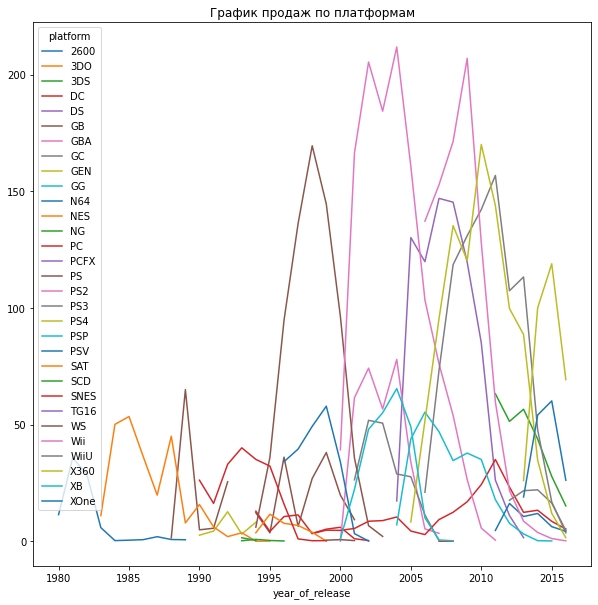

In [11]:
df.groupby(['platform','year_of_release'])['total_sales'].sum().unstack('platform').plot(figsize=(10,10),title='График продаж по платформам') #посторим распределение по годам, платформам и суммарными продажами

plt.show()

In [12]:
top5_platform = df.groupby('platform')['total_sales'].count().sort_values(ascending=False).head() # найдем пять платформ с наибольшимим суммарными продажами
display(top5_platform)

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
Name: total_sales, dtype: int64

In [13]:
df_top5_platform = df[df['platform'].isin(top5_platform.index)] #посмотрим на данные по пяти top - платформам
df_top5_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


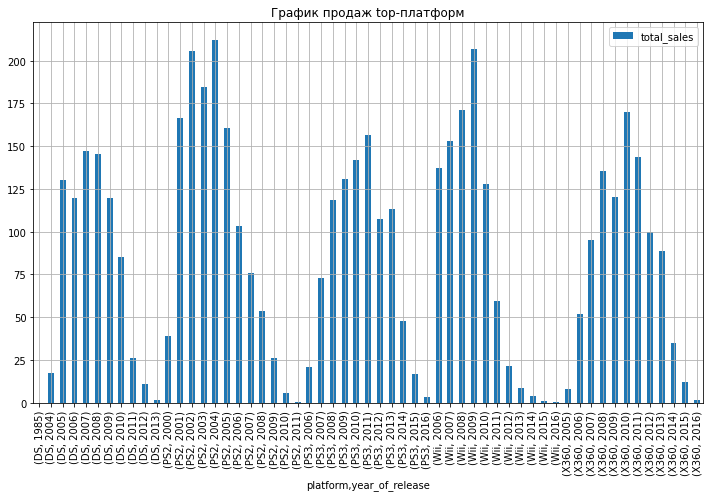

In [14]:
df_top5_platform.pivot_table(index=(['platform','year_of_release']),values='total_sales',aggfunc='sum').plot(kind='bar',grid=True,figsize=(12,7),title='График продаж top-платформ') #посторим распределение по годам, top-платформам и суммарными продажами
    
plt.show()

**Вывод**

Посмотрели распределение по годам, платформам и суммарными продажами, отобрали пять платформ с наибольшими продажами.Приблизительно 4-5 лет платформы находятся на пике и за такое же время проходит снижение и исчезают.


In [15]:
df_actually = df.query('year_of_release >= 2013') # выделяем сегмент актуального периода с 2013 года по 2016
display(df_actually)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


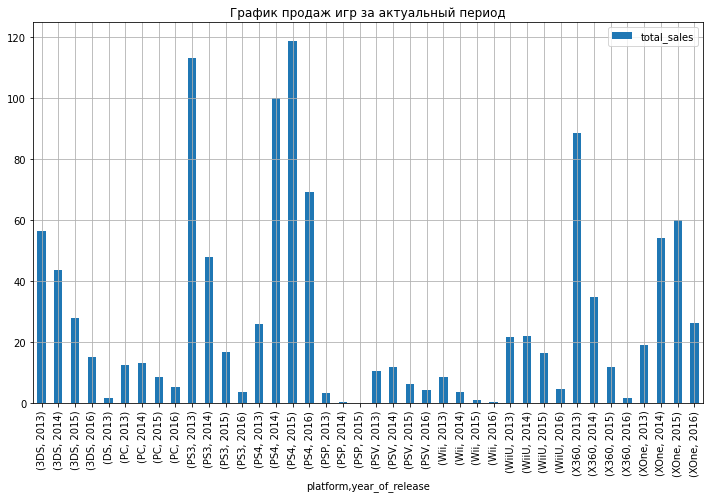

In [16]:
df_actually.pivot_table(index=(['platform','year_of_release']),values='total_sales',aggfunc='sum').plot(kind='bar',grid=True,figsize=(12,7),title='График продаж игр за актуальный период') #посторим распределение продаж игр по платформам за актуальный период с 2013 по 2016 г.
    
plt.show()

**Вывод**

Выделили сегмент актуального периода с 2013 года по 2016. Продажи игр на всех платформах за актуальный период снижаются.
Более перспективными выделяю платформы:PC,PS4,PSV,XOne.

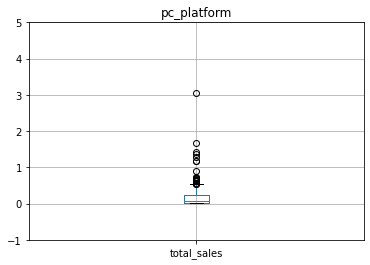

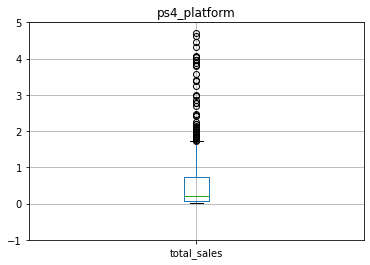

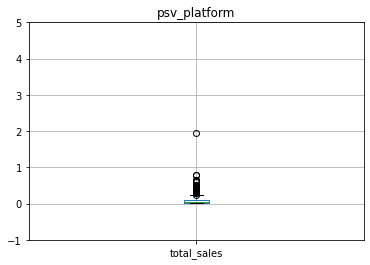

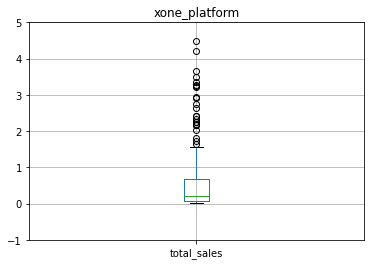

In [17]:
leader_platform = df_actually[df_actually['platform'].isin(['PC','PS4','PSV','XOne'])] #выделим лидирующие платформы
pc_platform = leader_platform[leader_platform['platform'] == 'PC']
ps4_platform = leader_platform[leader_platform['platform'] == 'PS4']
psv_platform = leader_platform[leader_platform['platform'] == 'PSV']
xone_platform = leader_platform[leader_platform['platform'] == 'XOne']

# строим диаграмму размаха по глобальным продажам игр в разбивке по платформам.
pc_platform.boxplot('total_sales')
plt.title('pc_platform')
plt.ylim(-1,5)
plt.xlim(0,2)
plt.show()

ps4_platform.boxplot('total_sales')
plt.title('ps4_platform')
plt.ylim(-1,5)
plt.xlim(0,2)
plt.show()

psv_platform.boxplot('total_sales')
plt.title('psv_platform')
plt.ylim(-1,5)
plt.xlim(0,2)
plt.show()

xone_platform.boxplot('total_sales')
plt.title('xone_platform')
plt.ylim(-1,5)
plt.xlim(0,2)
plt.show()


**Вывод**

Выделила лидирующие платформы и постоила диаграмму размаха по глобальным продажам игр в разбивке по платформам. По рузельтатам гарфиков можно выделить две успешные платформы- PS4,XOne.


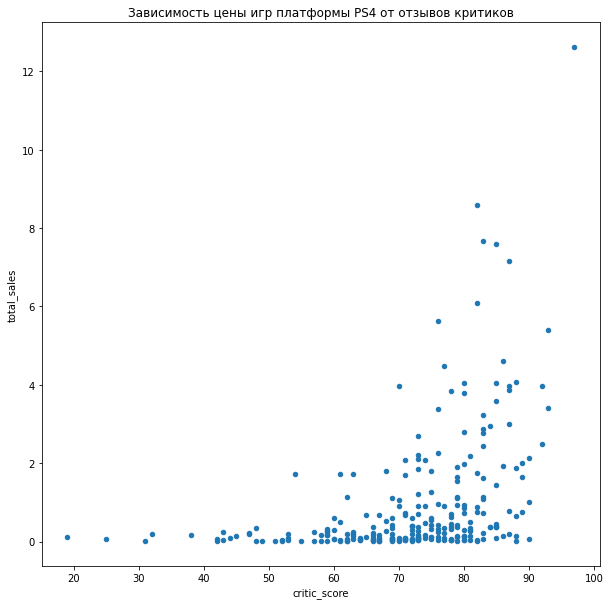

In [18]:
ps4_platform.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(10,10)) #посмотрим на цену игр платформы PS4 и отзывы критиков
plt.title('Зависимость цены игр платформы PS4 от отзывов критиков')
plt.show()

In [19]:
display(ps4_platform['total_sales'].corr(ps4_platform['critic_score'])) #считаем корреляцию между отзывами критиков и глобальными продажами.

0.406567902061781

**Вывод**

Постоила диаграмму рассеяния и посчитала корреляцию.
Величина 0.40 говорит о наличии связи, от увеличения оценки критиков растет цена игр платформы PS4.

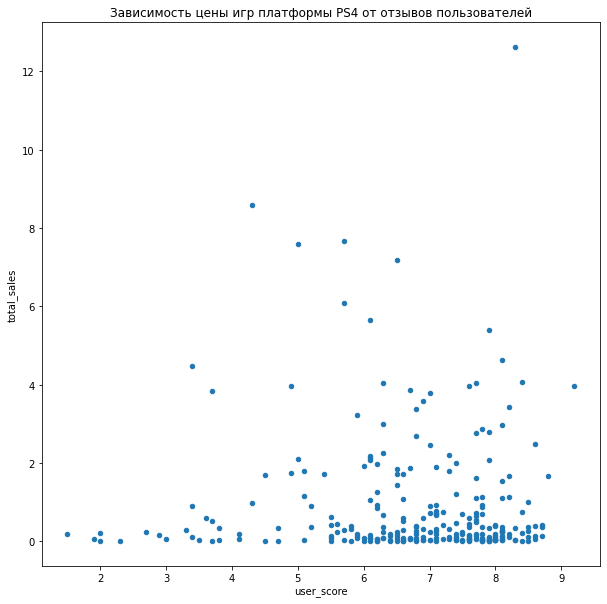

In [20]:
ps4_platform.plot(x='user_score',y='total_sales',kind='scatter',figsize=(10,10)) #посмотрим на цену игр платформы PS4 и отзывы пользователей
plt.title('Зависимость цены игр платформы PS4 от отзывов пользователей')
plt.show()

In [21]:
display(ps4_platform['total_sales'].corr(ps4_platform['user_score']))

-0.027427851974847157

**Вывод**

Постоила диаграмму рассеяния и посчитала корреляцию. Величина -0.02 говорит об отсутсвии связи между оценками пользователей и увеличением цены игр платформы PS4.

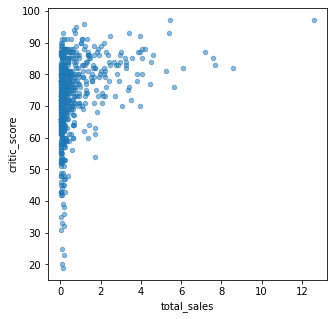

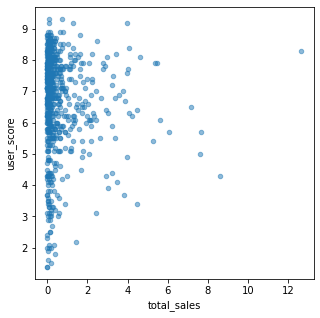

In [22]:
for column in ['critic_score','user_score']: #посмотрим на диаграммы рассеяния
    leader_platform.plot(
    kind='scatter',
    x='total_sales',
    y=column,
    alpha=0.5,
    figsize=(5,5))
    plt.show()

In [23]:
platform = ['PC','PSV','XOne'] #применим функцию для подсчета корреляции по 3-м другим платформам актуального периода 
for platform in platform:
    display(leader_platform[leader_platform['platform'] == platform][['total_sales','critic_score','user_score']].corr())

,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.097723
critic_score,0.196030,1.000000,0.429562
user_score,-0.097723,0.429562,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.254742,0.009816
critic_score,0.254742,1.000000,0.509862
user_score,0.009816,0.509862,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.070505
critic_score,0.416998,1.000000,0.453023
user_score,-0.070505,0.453023,1.000000


**Вывод**

Построила диаграммы рассеяния по платформам PC,PSV,XOne актуального периода.

При помощи функции посчитали корреляцию по платформам PC,PSV,XOne актуального периода:
_________
- Величина 0.19 говорит о наличии слабой связи - от увеличения оценки критиков растет цена игр платформы PC.
- Величина 0.25 говорит о наличии связи - от увеличения оценки критиков растет цена игр платформы PSV.
- Величина 0.41 говорит о наличии связи - от увеличения оценки критиков растет цена игр платформы XOne.
_________
- Величина -0.09 говорит об отсутсвии связи между оценками пользователей и увеличением цены игр платформы PC.
- Величина 0.009 говорит об отсутсвии связи между оценками пользователей и увеличением цены игр платформы PSV.
- Величина -0.07 говорит об отсутсвии связи между оценками пользователей и увеличением цены игр платформы XOne.

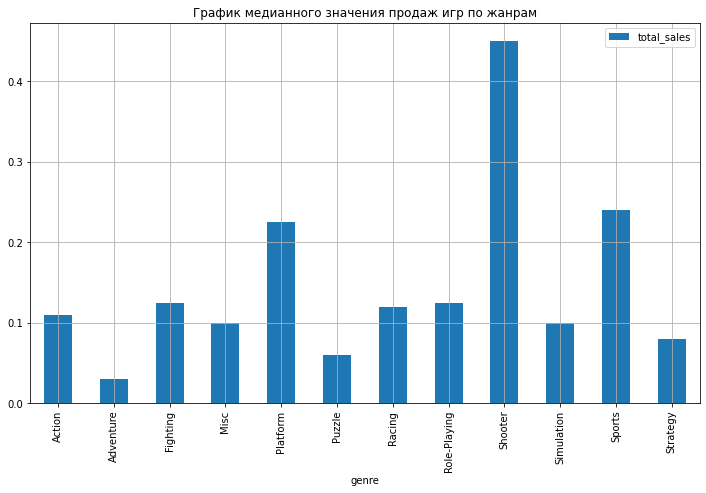

In [24]:
df_actually.pivot_table(index='genre', values='total_sales',aggfunc='median').plot(kind='bar',grid=True,figsize=(12,7),title='График медианного значения продаж игр по жанрам') #проверим зависят ли продажи от жанра игр
    
plt.show()

**Вывод**

Посторили столбчатую диаграмму, чтобы посмотреть на зависимость продаж игр и их жанров.
Самые прибыльные по жанрам игры: Shooter, Sports, Platform.
Также можно выделить жанры с самыми низкими продажами: Puzzle, Adventure.

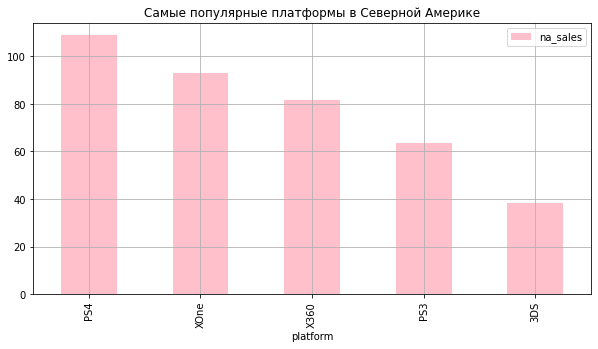

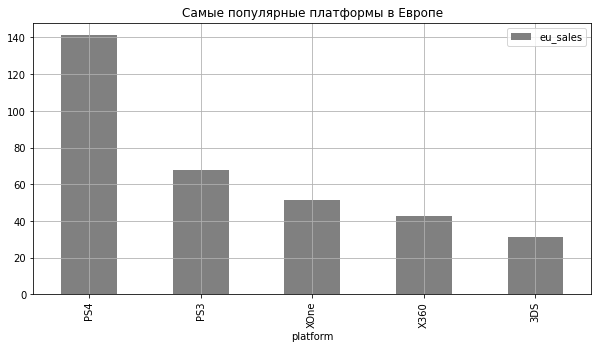

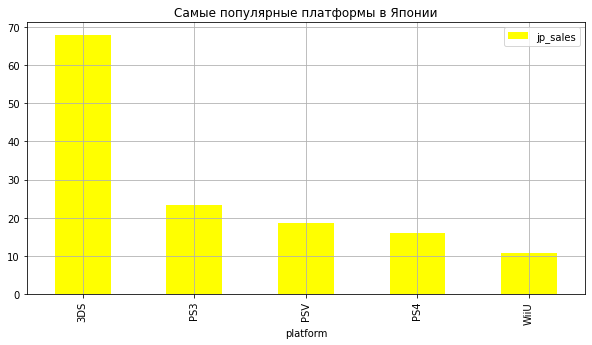

In [25]:
df_actually.groupby(['platform']).agg({'na_sales':'sum'}).sort_values(by='na_sales',ascending=False).head().plot(kind='bar',color='pink',grid=True,figsize=(10,5),title='Cамые популярные платформы в Северной Америке')
plt.show()

df_actually.groupby(['platform']).agg({'eu_sales':'sum'}).sort_values(by='eu_sales',ascending=False).head().plot(kind='bar',color='grey',grid=True,figsize=(10,5),title='Cамые популярные платформы в Европе')
plt.show()

df_actually.groupby(['platform']).agg({'jp_sales':'sum'}).sort_values(by='jp_sales',ascending=False).head().plot(kind='bar',color='yellow',grid=True,figsize=(10,5),title='Cамые популярные платформы в Японии')
plt.show()


**Вывод**

Определили самые популярные платформы для Северной Америки, Европы и Японии(топ-5). 

Основные различия: 

- в Северной Америке самые популярные платформы:PS4,Xone,X360
- в Европе самые популярные платформы:PS4,PS3,Xone
- в Японии самые популярные платформы: 3DS,PS3,PSV

In [26]:
na_sales_genre = df_actually.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False).head() # посмотрим на самые популярные жанры игр в Северной Америке
display('Самые популярные жанры игр в Северной Америке',na_sales_genre)

'Самые популярные жанры игр в Северной Америке'

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [27]:
eu_sales_genre = df_actually.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False).head()  # посмотрим на самые популярные жанры игр в Европе
display('Самые популярные жанры игр в Европе',eu_sales_genre)

'Самые популярные жанры игр в Европе'

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [28]:
jp_sales_genre = df_actually.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head() # посмотрим на самые популярные жанры игр в Японии
display('Самые популярные жанры игр в Японии ',jp_sales_genre)

'Самые популярные жанры игр в Японии '

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


**Вывод**

Определили для каждого региона (NA, EU, JP) самые популярные жанры игр. В Северной Америке и Европе лидируют продажи игр жанра Action, в Японии - Role-Playing.

In [29]:
na_sales_rating = df_actually.pivot_table(index='rating', values='na_sales',aggfunc='sum').sort_values('na_sales',ascending=False) # посмотрим на рейтинг и продажи игр в Северной Америке
display('Рейтинг и продажи игр в Северной Америке',na_sales_rating)

'Рейтинг и продажи игр в Северной Америке'

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [30]:
eu_sales_rating = df_actually.pivot_table(index='rating', values='eu_sales',aggfunc='sum').sort_values('eu_sales',ascending=False)  # посмотрим на рейтинг и продажи игр в Европе
display('Рейтинг и продажи игр в Европе',eu_sales_rating)

'Рейтинг и продажи игр в Европе'

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [31]:
jp_sales_rating = df_actually.pivot_table(index='rating', values='jp_sales',aggfunc='sum').sort_values('jp_sales',ascending=False).head() # посмотрим рейтинг и продажи игр в Японии
display('Рейтинг и продажи игр в Японии ',jp_sales_rating)

'Рейтинг и продажи игр в Японии '

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


**Вывод**

Определили рейтинг продаж по регионам. В Северной Америке и Европе лидируют продажи игр рейтинга ESRB M(Mature)-от 17 лет.
В Японии T(Teen)- для подростков 13-19 лет.

## Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую и альтернативную гипотезы:

- H0 - средние пользовательские рейтинги платформ Xbox One и PC равны
- H1 - средние пользовательские рейтинги платформ Xbox One и PC не равны



In [32]:
xone = df_actually.query('platform == "XOne"')['user_score']
pc = df_actually.query('platform == "PC"')['user_score']
alpha = 0.05 #задаем критический уровень статистической значимости
results = st.ttest_ind(xone,pc,equal_var=False,nan_policy='omit')
print('p-значение:',results.pvalue)
if results.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16097023533449004
Не получилось отвергнуть нулевую гипотезу


**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформулируем нулевую и альтернативную гипотезы:

- H0 - средние пользовательские рейтинги жанров Action и Sports равны
- H1 - средние пользовательские рейтинги жанров Action и Sports не равны

In [33]:
action = df_actually.query('genre == "Action"')['user_score']
sports = df_actually.query('genre == "Sports"')['user_score']
alpha = 0.05 #задаем критический уровень статистической значимости
results = st.ttest_ind(action,sports,equal_var=False,nan_policy='omit')
print('p-значение:',results.pvalue)
if results.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.631940781789286e-19
Отвергаем нулевую гипотезу


**Вывод**

После проверки гипотез вывлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.



## Общий вывод

Посмотрели данные распределение по годам, платформам и суммарными продажами, отобрали пять платформ с наибольшими продажами. Более перспективными выделили платформы:PC,PS4,PSV,XOne. Проанализировав данные выявили, что от увеличения оценки критиков растет цена игр перспективных платформ, а от оценок пользователей увеличение цены игр не зависит.

Самые прибыльные по жанрам игры: Shooter, Sports, Platform. В Северной Америке и Европе лидируют продажи игр жанра Action, в Японии - Role-Playing. В Северной Америке и Европе лидируют продажи игр рейтинга ESRB M(Mature)-от 17 лет. В Японии T(Teen)- для подростков 13-19 лет.

После проверки гипотез вывлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.